In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

: 

In [80]:
df=pd.read_csv('covid_19_india.csv')
df.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [81]:
df.shape

(18110, 9)

In [82]:
# shows that all values are valid
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [83]:
#drom Sno from the df
df.drop(columns= ['Sno'],inplace=True)
df.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [84]:
# date & Time column concatenation.
df['DateTime'] = df['Date'] + ' ' + df['Time']
df.head(5)


,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,DateTime
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020-01-30 6:00 PM
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020-01-31 6:00 PM
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020-02-01 6:00 PM
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020-02-02 6:00 PM
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020-02-03 6:00 PM


In [85]:
#DateTime to proper date format
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [86]:
# Remove old date time columns
df.drop(columns= ['Date','Time'],inplace=True)
df.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,DateTime
0,Kerala,1,0,0,0,1,2020-01-30 18:00:00
1,Kerala,1,0,0,0,1,2020-01-31 18:00:00
2,Kerala,2,0,0,0,2,2020-02-01 18:00:00
3,Kerala,3,0,0,0,3,2020-02-02 18:00:00
4,Kerala,3,0,0,0,3,2020-02-03 18:00:00


In [87]:
# reorder last column to 1st

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()


,DateTime,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30 18:00:00,Kerala,1,0,0,0,1
1,2020-01-31 18:00:00,Kerala,1,0,0,0,1
2,2020-02-01 18:00:00,Kerala,2,0,0,0,2
3,2020-02-02 18:00:00,Kerala,3,0,0,0,3
4,2020-02-03 18:00:00,Kerala,3,0,0,0,3


In [88]:
# 3.1.	How many corona patients were confirmed in Kerala?
# Answer = 458906023
kerala_sum = df[df['State/UnionTerritory'] == 'Kerala']['Confirmed'].sum()
kerala_sum

458906023

In [89]:
# which state has the highest number of cured Patients

# Group by state and sum the cured cases
#Groupby condition
cured_by_state = df.groupby('State/UnionTerritory')['Cured'].sum()

# Find the state with the highest number of cured cases
state_with_highest_cured = cured_by_state.idxmax()

print(f"The state with the highest number of cured cases is: {state_with_highest_cured}")


The state with the highest number of cured cases is: Maharashtra


In [101]:
# 3.3.	How many patients died during 2020 to 2021?
#Answer = 17022508
died_condition = df[(df['DateTime'] >= '2020') & (df['DateTime'] <= '2021')]
died_condition["Deaths"].sum()

17022508

In [91]:
# 3.4.	Which state has the highest number of confirmed cases?
highest_number = df.groupby('State/UnionTerritory')['Confirmed'].sum()
sorted_grouped_df = highest_number.sort_values(ascending=False).index[0]
print(f"The state with the highest number of confirmed cases is: {sorted_grouped_df}")


The state with the highest number of confirmed cases is: Maharashtra


In [92]:
# 4.1.	Visualize the distribution of corona patients from 2020 to 2021.

In [107]:
#  Visualize the distribution of corona patients from 2020 to 2021.

# Filter data for the years 2020 and 2021
df_2020_2021 = df[(df['DateTime'].dt.year >= 2020) & (df['DateTime'].dt.year <= 2021)]

# Group by date and sum the confirmed cases
year_condition = df[(df['DateTime'] >= '2020') & (df['DateTime'] <= '2021')]
confirmed_df = year_condition.groupby('State/UnionTerritory')['Confirmed'].sum()
confirmed_df





,Confirmed
State/UnionTerritory,
Andaman and Nicobar Islands,590838
Andhra Pradesh,104134066
Arunachal Pradesh,1679508
Assam,26440101
Bihar,29298924
Cases being reassigned to states,345565
Chandigarh,1822281
Chhattisgarh,21901975
Dadra and Nagar Haveli and Daman and Diu,458804


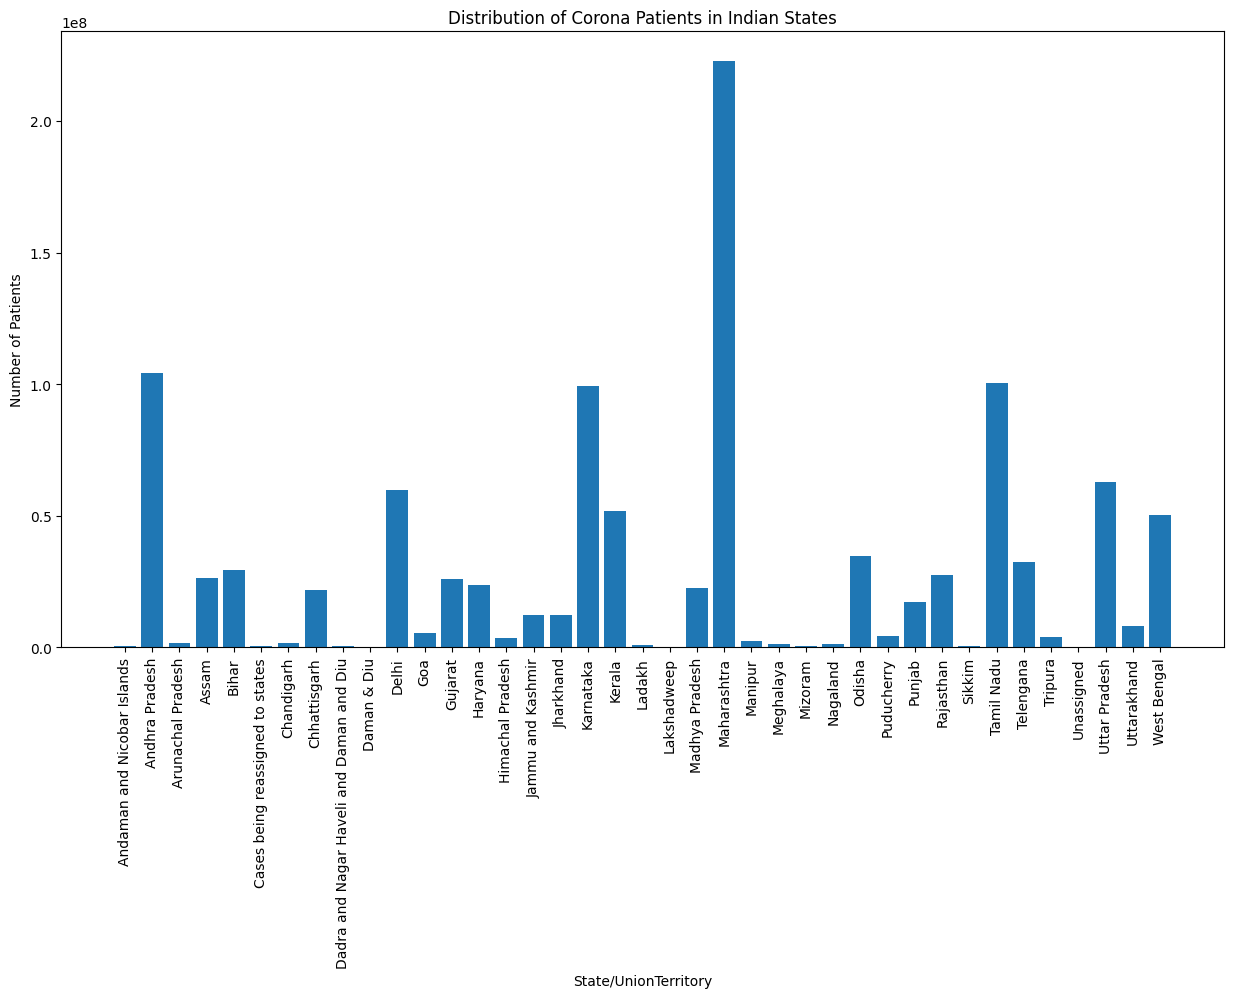

In [108]:
# prompt: Visualize the distribution of corona patients in all the states of India
plt.figure(figsize=(15, 8))
plt.bar(confirmed_df.index, confirmed_df.values)
plt.xticks(rotation=90) # this is necessary as the text of state names are overlapped
plt.title('Distribution of Confirmed Corona Patients in Indian States')
plt.xlabel('State/UnionTerritory')
plt.ylabel('Number of Patients')
plt.show()


In [111]:
	# Visualize the total number of deaths in all the states.
confirmed_deaths = df.groupby('State/UnionTerritory')['Deaths'].sum()
confirmed_deaths.head()


,Deaths
State/UnionTerritory,
Andaman and Nicobar Islands,27136
Andhra Pradesh,2939367
Arunachal Pradesh,26799
Assam,638323
Bihar,1093466


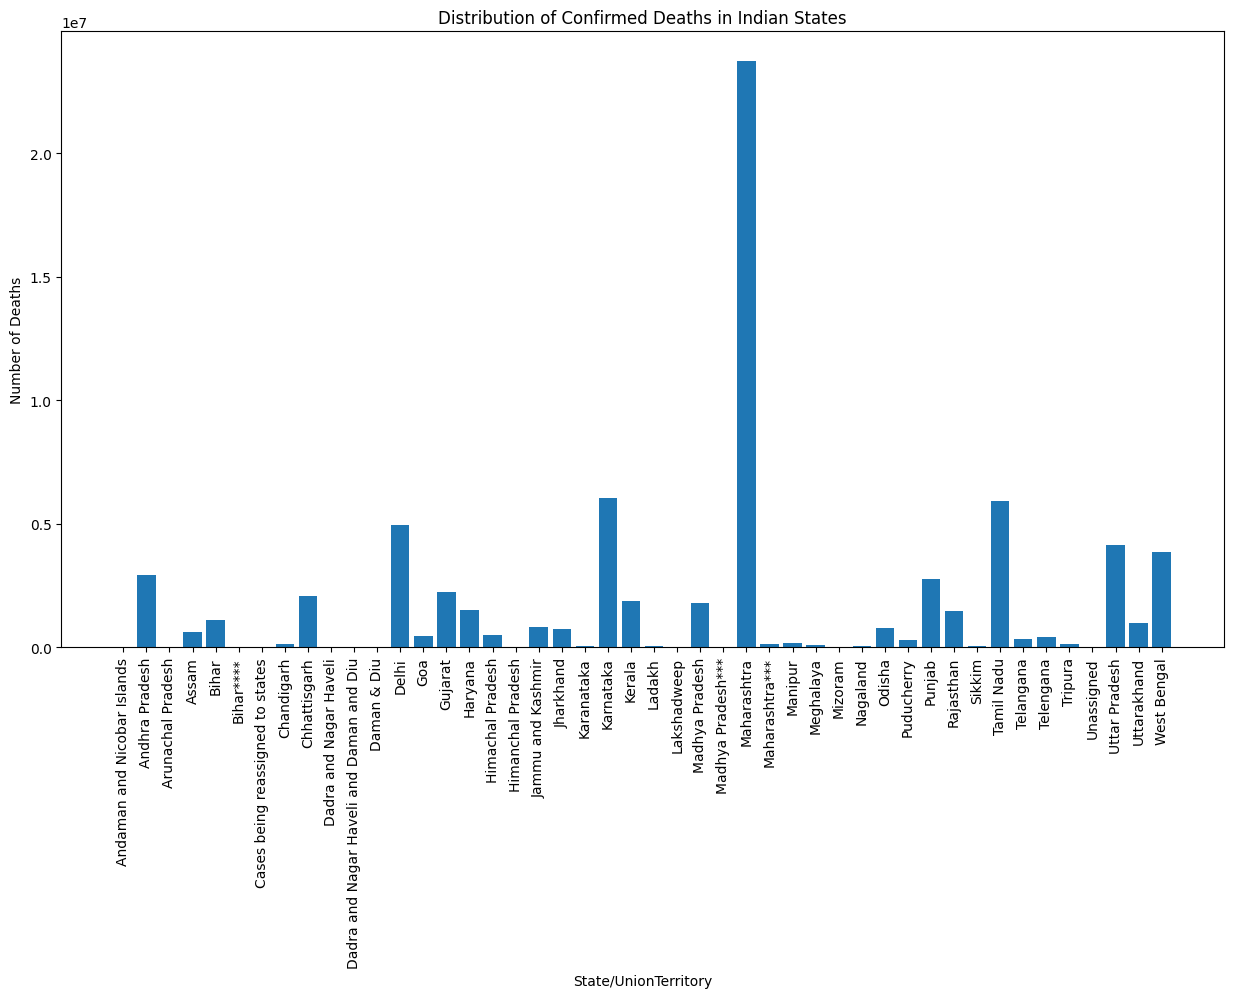

In [112]:
plt.figure(figsize=(15, 8))
plt.bar(confirmed_deaths.index, confirmed_deaths.values)
plt.xticks(rotation=90) # this is necessary as the text of state names are overlapped
plt.title('Distribution of Confirmed Deaths in Indian States')
plt.xlabel('State/UnionTerritory')
plt.ylabel('Number of Deaths')
plt.show()